Task:

1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2.Figure out if any preprocessing such as scaling would help here

3.Draw elbow plot and from that figure out optimal value of k

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [12]:
# create df
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# append flower id to df
df["flower"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# dropping petal details and fower id
df.drop(["sepal length (cm)", "sepal width (cm)", "flower"], axis= "columns", inplace= True)
df.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Create k means classifier

In [16]:
km = KMeans(n_clusters= 3)
predicted = km.fit_predict(df)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
df["cluster"] = predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [18]:
# see unique features in cluster df
df.cluster.unique()

array([1, 2, 0])

In [19]:
# create unique dfs for each unique feature
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

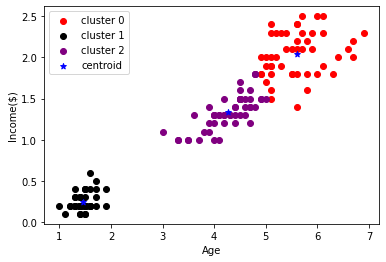

In [23]:
# plot the clusters
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color= "red", label= "cluster 0")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color= "black", label= "cluster 1")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color= "purple", label= "cluster 2")

# plotting the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'blue', marker= '*', label= 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow plot

In [24]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    # in each iteration create a new model
    km = KMeans(n_clusters= k)
    km.fit(df)
    # calculate sse, use .inertia_ method
    sse.append(km.inertia_)

C:\Users\kimani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
sse

[650.7886666666667,
 186.27970291146764,
 31.371358974358966,
 22.649637861231323,
 14.194307692307701,
 11.415117424242423,
 9.281343349632822,
 7.805547368421051,
 6.885904677194149]

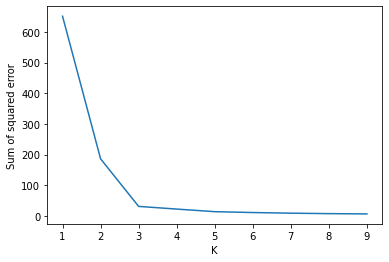

In [26]:
# plotting elbow plot
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)